In [14]:
# A Journey to Web Data via XML Parsing, API Integration, and Web Scraping  -  By Prajeeth Nakka

## Part 1


### 1


In [15]:
import requests

class SitemapParser:
    """
    SitemapParser class for fetching and parsing sitemaps from the robots.txt file of a website.

    Attributes:
        baseUrl (str): The base URL of the website.
        sitemapUrls (list): A list to store sitemap URLs extracted from robots.txt.

    Methods:
        fetchRobotsTxt() -> str or None:
            Fetches the content of the robots.txt file for the website.

        parseSitemapUrls(robotsTxtContent: str) -> None:
            Parses the robots.txt content to extract sitemap URLs.

        fetchAndParseSitemaps() -> None:
            Fetches and parses each sitemap URL in the sitemapUrls list.
            Assumes each sitemap contains URLs and displays the results.

    """

    def __init__(self, baseUrl: str):
        """
        Initializes a SitemapParser instance with a base URL.

        Args:
            baseUrl (str): The base URL of the website.
        """
        # Initializing the SitemapParser with a base URL and an empty list for sitemap URLs
        self.baseUrl = baseUrl
        self.sitemapUrls = []

    def fetchRobotsTxt(self) -> str or None:
        """
        Fetches the content of the robots.txt file for the website.

        Returns:
            str or None: The content of the robots.txt file if successful, None if there is an error.
        """
        try:
            # Fetching the robots.txt file for the base URL
            response = requests.get(f"{self.baseUrl}/robots.txt")
            if response.status_code == 200:
                return response.text
            else:
                print(f"Error fetching robots.txt: {response.status_code}")
                return None
        except Exception as e:
            print(f"Error fetching robots.txt: {e}")
            return None

    def parseSitemapUrls(self, robotsTxtContent: str) -> None:
        """
        Parses the robots.txt content to extract sitemap URLs.

        Args:
            robotsTxtContent (str): The content of the robots.txt file.
        """
        try:
            # Parsing the robots.txt content to extract sitemap URLs
            lines = robotsTxtContent.split('\n')
            sitemaps = [line.split(': ')[-1] for line in lines if line.startswith('Sitemap:')]
            self.sitemapUrls = sitemaps
        except Exception as e:
            print(f"Error parsing sitemap URLs: {e}")

    def fetchAndParseSitemaps(self) -> None:
        """
        Fetches and parses each sitemap URL in the sitemapUrls list.
        Assumes each sitemap contains URLs and displays the results.
        """
        for sitemapUrl in self.sitemapUrls:
            try:
                # Fetching each sitemap URL
                response = requests.get(sitemapUrl)
                if response.status_code == 200:
                    # Parsing the sitemap content using an XML parser
                    soup = BeautifulSoup(response.text, 'xml')

                    # Assuming the sitemap contains URLs, create a DataFrame
                    urls = [url.text for url in soup.find_all('url')]
                    df = pd.DataFrame(urls, columns=['url'])
                    
                    # Displaying the sitemap URL and the first few rows of the DataFrame
                    print(f"Sitemap: {sitemapUrl}")
                    print(df.head())
                else:
                    print(f"Error fetching sitemap data ({sitemapUrl}): {response.status_code}")
            except Exception as e:
                print(f"Error parsing sitemap ({sitemapUrl}): {e}")

def main():
    baseUrl = "https://www.openai.com"
    parser = SitemapParser(baseUrl)
    
    # Fetching the content of the robots.txt file
    robotsTxtContent = parser.fetchRobotsTxt()

    if robotsTxtContent:
        # Parsing the sitemap URLs from robots.txt
        parser.parseSitemapUrls(robotsTxtContent)

        if parser.sitemapUrls:
            # Fetching and parse each sitemap
            parser.fetchAndParseSitemaps()
        else:
            print("No sitemaps found in robots.txt.")
    else:
        print("Failed to fetch robots.txt.")

if __name__ == "__main__":
    main()


Sitemap: https://openai.com/sitemap.xml
                                                 url
0  https://openai.com/research/dall-e-3-system-ca...
1  https://openai.com/research/gpt-4v-system-card...
2  https://openai.com/research/confidence-buildin...
3  https://openai.com/research/frontier-ai-regula...
4  https://openai.com/research/improving-mathemat...


### 2



**Purpose:**

The script extracts URLs from the OpenAI website's sitemaps.
It gathers information about the website's structure and content.

**Process:**

**Initialization:**
   Created a SitemapParser object with the OpenAI base URL.

**Robots.txt Retrieval:**
   Fetched the robots.txt file from the OpenAI website.
   Checked for errors and handle them accordingly.

**Sitemap URL Extraction:**
   Parsed the robots.txt file to identify sitemap URLs.
   Storec the extracted URLs in a list.

**Sitemap Fetching and Parsing:**
   Iterated through the list of sitemap URLs.
   For each sitemap URL:
      *Fetched the sitemap content using an HTTP request.
      *Parsed the XML content of the sitemap using BeautifulSoup.
      *Extracted URLs from the parsed sitemap.
      *Created a Pandas DataFrame with the extracted URLs.
      *Displayed the DataFrame for each sitemap.

**Output:**

A structured dataset of URLs extracted from the sitemaps.

**Main Function:**

The main function initializes the parser with the OpenAI base URL.
It fetches the robots.txt content, parses the sitemap URLs, and proceeds to fetch and parse each sitemap.
The script informs the user if no sitemaps are found in the robots.txt file.

This script provides a valuable tool for understanding and analyzing the OpenAI website's content organization and structure.

## Part 2

### 1

In [16]:
import requests
import pandas as pd

class WeatherApi:
    """
    WeatherApi class for fetching weather data from the OpenWeatherMap API.

    Attributes:
        api_key (str): The API key for accessing the OpenWeatherMap API.
        base_url (str): The base URL of the OpenWeatherMap API.

    Methods:
        __init__(self, api_key: str) -> None:
            Initializes a WeatherApi instance with the provided API key.

        getWeatherData(self, city: str) -> pd.DataFrame or None:
            Makes a request to the OpenWeatherMap API for weather data of the specified city.
            Returns the weather data as a Pandas DataFrame.

    """

    def __init__(self, apiKey: str) -> None:
        """
        Initializes a WeatherApi instance with the provided API key.

        Args:
            apiKey (str): The API key for accessing the OpenWeatherMap API.
        """
        self.apiKey = apiKey
        self.baseUrl = "http://api.openweathermap.org/data/2.5/weather"

    def getWeatherData(self, city: str) -> pd.DataFrame or None:
        """
        Makes a request to the OpenWeatherMap API for weather data of the specified city.
        Returns the weather data as a Pandas DataFrame.

        Args:
            city (str): The name of the city for which weather data is requested.

        Returns:
            pd.DataFrame or None: Weather data as a Pandas DataFrame if successful, None if there is an error.
        """
        try:
            # Making a request to the OpenWeatherMap API
            params = {"q": city, "appid": self.apiKey}
            response = requests.get(self.baseUrl, params=params)

            if response.status_code == 200:
                # Parse the JSON response
                data = response.json()

                # Extracting relevant weather information
                weatherInfo = {
                    "City": data["name"],
                    "Country": data["sys"]["country"],
                    "Temperature (Celsius)": data["main"]["temp"],
                    "Humidity (%)": data["main"]["humidity"],
                    "Weather Condition": data["weather"][0]["description"],
                }

                # Creating a DataFrame from the extracted information
                df = pd.DataFrame([weatherInfo])
                return df

            else:
                print(f"Error fetching weather data: {response.status_code}")
                return None

        except Exception as e:
            print(f"Error: {e}")
            return None

def main():
    # Adding api key
    apiKey = "93a2504c07d2fe63304016f8c252a9a9"
    cityName = "London"

    # Creating an instance of the WeatherApi class
    weatherApi = WeatherApi(apiKey)

    # Getting weather data for the specified city
    weatherDf = weatherApi.getWeatherData(cityName)

    if weatherDf is not None:
        print(weatherDf)
    else:
        print("Failed to fetch weather data.")

if __name__ == "__main__":
    main()


     City Country  Temperature (Celsius)  Humidity (%) Weather Condition
0  London      GB                 281.92            86     broken clouds


### 2

**How the Code Works:**

Initialization:

- The WeatherApi class is initialized with an API key for the OpenWeatherMap API and the base URL.

- Fetching Weather Data:
The getWeatherData method makes a request to the OpenWeatherMap API with a specified city.
It parses the JSON response to extract relevant weather information.

- Data Extraction:
Extracted weather information includes the city name, country, temperature (in Celsius), humidity percentage, and weather condition.

- DataFrame Creation:
The extracted information is stored in a Pandas DataFrame, facilitating data manipulation and analysis.

- Error Handling:
The code includes error handling to manage potential exceptions during the API request and data parsing.

- Dataset Description:
The dataset obtained from the OpenWeatherMap API provides real-time weather information for a specific city.

**The dataset includes the following fields:**

City: The name of the city for which weather data is requested.
Country: The country code of the city.
Temperature (Celsius): The current temperature in Celsius.
Humidity (%): The humidity percentage in the air.
Weather Condition: A textual description of the current weather condition.

**Meaning of Fields:**
City and Country: Identifies the location for which the weather data is provided.
Temperature: Represents the current temperature in Celsius, indicating the level of heat or cold.
Humidity: Indicates the moisture content in the air, expressed as a percentage.
Weather Condition: Describes the current state of the weather, providing insights into conditions like rain, clear skies, snow, etc.

**Potential Use Cases and Questions:**

Travel Planning?
- We can determine the current weather conditions when planning a trip to a specific city.

Event Planning?
- We can consider weather conditions for event planning, such as outdoor gatherings or sports events.

Data Comparison:
Compare weather conditions across different cities for various analyses.

Climate Analysis:
Analyze temperature and humidity trends over time for climate studies.

Decision Support:
Use weather data to inform decisions in sectors like agriculture, where temperature and humidity play crucial roles.

Historical Analysis:
Collect and store historical weather data to analyze patterns and trends.

Overall, this dataset provides valuable insights into current weather conditions and can be utilized for various applications related to travel, planning, and climate analysis.

## Part 3

In [17]:
import requests
from bs4 import BeautifulSoup

class KatzStaffScraper:
    """
    A class for scraping staff information from the Yeshiva University Katz School of Science and Health website.
    """

    def __init__(self, url):
        """
        Initializes the KatzStaffScraper with the provided URL.

        Parameters:
        - url (str): The URL of the website containing staff information.
        """
        self.url = url

    def fetchData(self):
        """
        Fetches and parses staff information from the specified website.

        Returns:
        - list: A list of dictionaries containing staff information (name, title, and contactInfo).
        """
        try:
            # Sending a GET request to the specified URL
            response = requests.get(self.url)

            # Checking if the request was successful (status code 200)
            if response.status_code == 200:
                # Parsing the HTML content of the page
                soup = BeautifulSoup(response.text, 'html.parser')

                data = []  # List to store staff information

                # Extracting staff information
                staff_div = soup.find('div', class_='text-only')
                if staff_div:
                    staff_members = staff_div.find_all('p')
                    for member in staff_members:
                        # Spliting name and title using a comma
                        name_and_title = member.text.strip().split(',')
                        if len(name_and_title) == 2:
                            name, title = name_and_title
                            contact_info = member.find_next('p').text.strip()
                            data.append({
                                'name': name.strip(),
                                'title': title.strip(),
                                'contactInfo': contact_info
                            })

                    return data
                else:
                    print("No staff members found on the page.")
            else:
                print(f"Failed to fetch data. Status code: {response.status_code}")
        except Exception as e:
            print(f"Failed to fetch or parse data. Error: {e}")


scraper = KatzStaffScraper('https://www.yu.edu/katz/staff')
data = scraper.fetchData()
if data:
    for member in data:
        print(member)
else:
    print("No data fetched.")


{'name': 'Paul Russo', 'title': "Vice Provost and Dean\xa0\nProfessor of Data ScienceRead Dr. Russo's Biography", 'contactInfo': 'Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean\xa0aaron.ross2@yu.edu |\xa0646-592-4148 \xa0\n\xa0\nSofia Binioris, Director of Communications and Strategic Initiativessofia.binioris@yu.edu\xa0| 645-592-4719'}
{'name': 'Jackie Hamilton', 'title': 'Executive Director of Enrollment Management and Partnershipsjackie.hamilton@yu.edu | 646-787-6194', 'contactInfo': 'Pamela Rodman, Director of Finance and Administrationpamela.rodman@yu.edu | 646.592.4777'}
{'name': 'Pamela Rodman', 'title': 'Director of Finance and Administrationpamela.rodman@yu.edu | 646.592.4777', 'contactInfo': 'Tabitha Collazo, Business and Operations Coordinatortabitha.collazo@yu.edu | 646-592-4735'}
{'name': 'Tabitha Collazo', 'title': 'Business and Operations Coordinatortabitha.collazo@yu.edu | 646-592-4735', 'contactInfo': "Ann Leary,\xa0Office Manager/Executive Ass

**How the Code Works:**

- The class KatzStaffScraper is created, initialized with a URL pointing to the Yeshiva University Katz School of Science and Health staff page.

- The fetchData method is responsible for making a GET request to the specified URL, parsing the HTML content, and extracting staff information.

- The method uses BeautifulSoup to navigate the HTML and find relevant elements containing staff information.

- Extracted data is stored in a list of dictionaries, where each dictionary represents a staff member with fields for name, title, and contact information.

- The method returns the list of staff information.

**Dataset Description:**

**Fields:**
- Name: The name of the staff member.
- Title: The professional title or position of the staff member.
- ContactInfo: Contact information for the staff member, which may include email addresses and phone numbers.

**Questions to Answer using this Dataset:**

Staff Distribution: How many staff members are listed on the Katz School of Science and Health page?

Roles Breakdown: What are the different titles or roles held by staff members?

Contact Information: What is the contact information for each staff member?

Organizational Structure: Are there hierarchical levels or specific departments within the staff based on titles?

Staff Changes: Has there been any recent addition or removal of staff members?


This dataset could be used for basic analytics and understanding the composition of the staff at the Katz School of Science and Health. It provides insight into the roles and contact details of staff members, enabling analysis of organizational structure and facilitating communication within the institution.

## Part 4

                     name                                              title  \
0              Paul Russo  Vice Provost and Dean \nProfessor of Data Scie...   
1         Jackie Hamilton  Executive Director of Enrollment Management an...   
2           Pamela Rodman  Director of Finance and Administrationpamela.r...   
3         Tabitha Collazo  Business and Operations Coordinatortabitha.col...   
4               Ann Leary  Office Manager/Executive Assistant to the Dean...   
5            Jared Hakimi  Directorjared.hakimi@yu.edu | 646-592-4722 | S...   
6        Xavier Velasquez  Associate Director of Graduate Admissions Oper...   
7          Shayna Matzner  Assistant Directorshayna.matzner@yu.edu | 646-...   
8             Linyu Zheng  Assistant Directorlinyu.zheng@yu.edu | +1-332-...   
9   Hyokyeong "Kyeong" Yu  International Student Advisorhyokyeong.yu@yu.e...   
10            Aman Sharma  Recruitment Manager - South Asiaaman.sharma@yu...   
11           Rafael Reyes  Director of G

C:\Users\nakka\AppData\Local\Temp\ipykernel_9432\2335139458.py:81: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


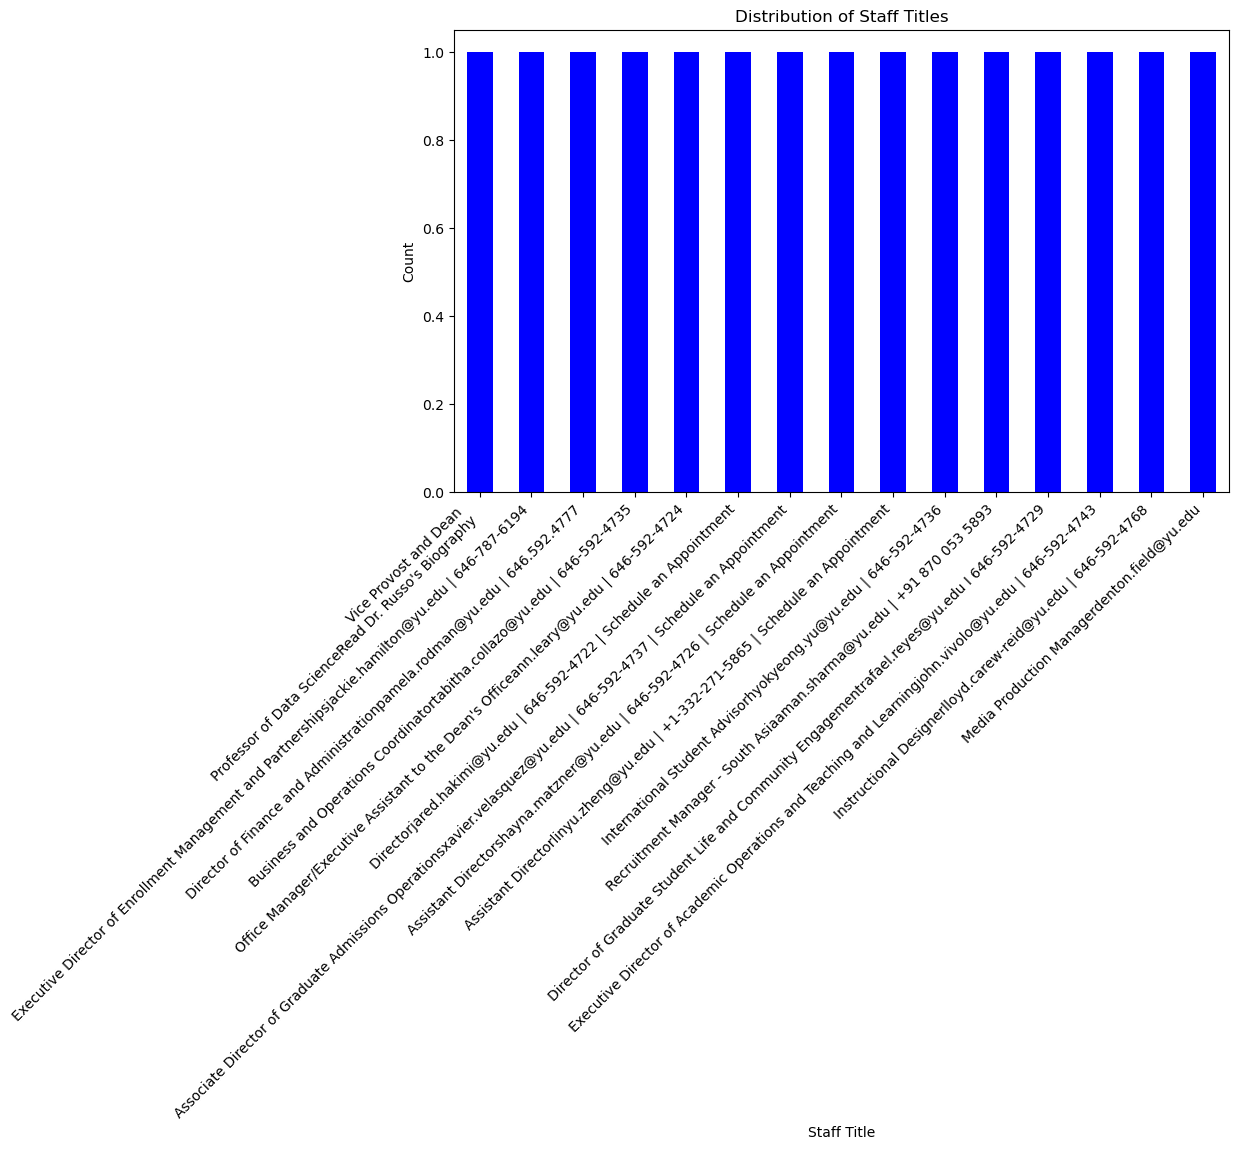

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

scrapedData = [
    {'name': 'Paul Russo', 'title': "Vice Provost and Dean\xa0\nProfessor of Data ScienceRead Dr. Russo's Biography", 'contactInfo': 'Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean\xa0aaron.ross2@yu.edu |\xa0646-592-4148 \xa0\n\xa0\nSofia Binioris, Director of Communications and Strategic Initiativessofia.binioris@yu.edu\xa0| 645-592-4719'},
    {'name': 'Jackie Hamilton', 'title': 'Executive Director of Enrollment Management and Partnershipsjackie.hamilton@yu.edu | 646-787-6194', 'contactInfo': 'Pamela Rodman, Director of Finance and Administrationpamela.rodman@yu.edu | 646.592.4777'},
    {'name': 'Pamela Rodman', 'title': 'Director of Finance and Administrationpamela.rodman@yu.edu | 646.592.4777', 'contactInfo': 'Tabitha Collazo, Business and Operations Coordinatortabitha.collazo@yu.edu | 646-592-4735'},
    {'name': 'Tabitha Collazo', 'title': 'Business and Operations Coordinatortabitha.collazo@yu.edu | 646-592-4735', 'contactInfo': "Ann Leary,\xa0Office Manager/Executive Assistant to the Dean's Officeann.leary@yu.edu | 646-592-4724"},
    {'name': 'Ann Leary', 'title': "Office Manager/Executive Assistant to the Dean's Officeann.leary@yu.edu | 646-592-4724", 'contactInfo': ''},
    {'name': 'Jared Hakimi', 'title': 'Directorjared.hakimi@yu.edu\xa0|\xa0646-592-4722 | Schedule an Appointment', 'contactInfo': 'Xavier Velasquez, Associate Director of Graduate Admissions Operationsxavier.velasquez@yu.edu | 646-592-4737 | Schedule an Appointment'},
    {'name': 'Xavier Velasquez', 'title': 'Associate Director of Graduate Admissions Operationsxavier.velasquez@yu.edu | 646-592-4737 | Schedule an Appointment', 'contactInfo': 'Shayna Matzner, Assistant Directorshayna.matzner@yu.edu\xa0| 646-592-4726 |\xa0Schedule an Appointment'},
    {'name': 'Shayna Matzner', 'title': 'Assistant Directorshayna.matzner@yu.edu\xa0| 646-592-4726 |\xa0Schedule an Appointment', 'contactInfo': 'Linyu Zheng,\xa0Assistant Directorlinyu.zheng@yu.edu\xa0|\xa0+1-332-271-5865 |\xa0Schedule an Appointment'},
    {'name': 'Linyu Zheng', 'title': 'Assistant Directorlinyu.zheng@yu.edu\xa0|\xa0+1-332-271-5865 |\xa0Schedule an Appointment', 'contactInfo': 'Hyokyeong "Kyeong" Yu, International Student Advisorhyokyeong.yu@yu.edu | 646-592-4736'},
    {'name': 'Hyokyeong "Kyeong" Yu', 'title': 'International Student Advisorhyokyeong.yu@yu.edu | 646-592-4736', 'contactInfo': 'Aman Sharma, Recruitment Manager - South Asiaaman.sharma@yu.edu\xa0|\xa0+91 870 053 5893'},
    {'name': 'Aman Sharma', 'title': 'Recruitment Manager - South Asiaaman.sharma@yu.edu\xa0|\xa0+91 870 053 5893', 'contactInfo': ''},
    {'name': 'Rafael Reyes', 'title': 'Director of Graduate Student Life and Community Engagementrafael.reyes@yu.edu I 646-592-4729', 'contactInfo': ''},
    {'name': 'John Vivolo', 'title': 'Executive Director of Academic Operations and Teaching and Learningjohn.vivolo@yu.edu\xa0|\xa0646-592-4743', 'contactInfo': 'Nebahat Bayrakcioglu, Academic Program Coordinator, Physician Assistant Studiesnebahat.bayrakcioglu@yu.edu\xa0|\xa0646-592-4034'},
    {'name': 'Lloyd Carew-Reid', 'title': 'Instructional Designerlloyd.carew-reid@yu.edu\xa0|\xa0646-592-4768', 'contactInfo': 'Denton Field, Media Production Managerdenton.field@yu.edu'},
    {'name': 'Denton Field', 'title': 'Media Production Managerdenton.field@yu.edu', 'contactInfo': ''}
]

class StaffDataAnalyzer:
    """
    StaffDataAnalyzer class for analyzing and visualizing staff data.

    Attributes:
        scrapedData (list): List of dictionaries containing scraped staff data.
        df (pd.DataFrame): DataFrame to store the scraped data.

    Methods:
        __init__(self, scraped_data: list):
            Initializes a StaffDataAnalyzer instance with scraped data.

        convert_to_dataframe(self) -> pd.DataFrame:
            Converts the list of dictionaries to a DataFrame.

        display_dataframe(self) -> None:
            Displays the DataFrame.

        plot_roles_distribution(self) -> None:
            Plots a bar chart for the distribution of staff titles.
    """

    def __init__(self, scraped_data: list):
        """
        Initializes a StaffDataAnalyzer instance with scraped data.

        Args:
            scraped_data (list): List of dictionaries containing scraped staff data.
        """
        self.scrapedData = scraped_data
        self.df = None

    def convert_to_dataframe(self) -> pd.DataFrame:
        """
        Converts the list of dictionaries to a DataFrame.

        Returns:
            pd.DataFrame: The DataFrame containing the scraped data.
        """
        df = pd.DataFrame(self.scrapedData)
        return df

    def display_dataframe(self) -> None:
        """Displays the DataFrame."""
        if self.df is not None:
            print(self.df)
        else:
            print("DataFrame is not available. Please convert the data first.")

    def plot_roles_distribution(self) -> None:
        """Plots a bar chart for the distribution of staff titles."""
        if self.df is not None and 'title' in self.df.columns:
            roles_distribution = self.df['title'].value_counts()
            plt.figure(figsize=(10, 6))
            roles_distribution.plot(kind='bar', color='blue')
            plt.title('Distribution of Staff Titles')
            plt.xlabel('Staff Title')
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("DataFrame or 'title' column is not available. Please convert the data first.")


staff_analyzer = StaffDataAnalyzer(scrapedData)
staff_analyzer.df = staff_analyzer.convert_to_dataframe()

staff_analyzer.display_dataframe()
staff_analyzer.plot_roles_distribution()


The bar plot generated shows the distribution of staff titles within the dataset. Each bar represents a unique staff title, and the height of the bar corresponds to the count or frequency of that particular staff title in the dataset.

Interpretation of the plot:

X-axis (Staff Title): Each bar on the x-axis represents a staff title.

Y-axis (Count): The height of each bar represents the number of occurrences of the respective staff title in the dataset.

Color: The bars are colored in blue for better visualization.

By examining this plot, we can quickly identify which staff titles are more prevalent or less prevalent in the dataset. Staff titles with taller bars have a higher count, while those with shorter bars have a lower count.

This type of visualization is helpful for understanding the distribution of roles within the staff and identifying any patterns or commonalities in the titles. It provides a snapshot of the composition of staff members based on their titles.



## References

Pandas documentation. (n.d.). pandas.DataFrame.info. Retrieved March 5, 2023, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html


Matplotlib: Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.2007.55

Seaborn: Waskom, M. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021